# Wstęp

Zadanie nr 13 wprowadza zagadnienie głębokich modeli uczenia ze wzmocnieniem (*Deep Reinforcement Learning*, **DRL**) - modeli, które uczone są przez interakcję z otoczeniem, obserwując konsekwencję działań oraz przyznawaną wartość nagrody.

## Cel ćwiczenia

Celem ćwiczenia jest zapoznanie z:
* koncepcją głębokiego uczenia ze wzmocnieniem,
* podstawowymi podejściami w głębokim uczeniu ze wzmocnieniem,
* przykładowymi środowiskami, wykorzystywanym w DRL,
* jedną z podstawowych metod DRL opartą na funkcji wartości.


# Głębokie uczenie ze wzmocnieniem

Podstawa reinforcement learning jest uczenie przez interakcje ̨: agent oddziałuje z otoczeniem i, obserwując konsekwencje jego działań, może uczyć się jak zmienić swoje zachowanie by zmaksymalizować wartość otrzymanej nagrody.

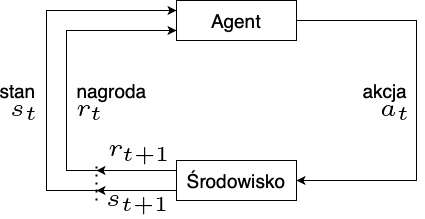

Zasada działania modelu uczenia ze wzmocnieniem jest następująca: autonomiczny agent, sterowany przez model, obserwuje **stan $s_t$ środowiska** w kroku czasowym $t$. Agent oddziałuje z otoczeniem podejmując **akcję $a_t$**, co powoduje przejście otoczenia i agenta do nowego stanu $s_{t+1}$. Przejście to odbywa się na podstawie **funkcji przejścia stanów $T(s_{t+1} | s_t, a_t)$** (równoważnej środowisku) - na podstawie aktualnego stanu i podjętej akcji. Zakładamy, że informacja o stanie jest wystarczająca dla agenta do podjęcia optymalnej akcji.

Sekwencja akcji wybierana jest na podstawie nagrody, przyznawanej przez otoczenie agentowi. Każde przejście środowiska do nowego stanu powoduje nagrodzenie agenta **nagrodą $r_t$**, tj. wartością skalarną, określającą "poprawność" podjętej decyzji. Celem uczenia modelu DRL jest wyuczenie **strategii**, maksymalizującej łączną uzyskiwaną wartość nagrody (*zwrot*).

Agent uczenia ze wzmocnieniem może składać się z następujących elementów (w zależności od stosowanego podejścia zawiera jeden lub więcej z nich):
* **strategia** (ang. *policy*), tj. funkcja zachowywania się agenta; może być deterministyczna $a = \pi(s)$ lub stochastyczna $\pi(a|s)=p(a_t=a | s_t=s)$;
* **funkcja wartości** (ang. *value function*), tj. funkcja służąca do predykcji przyszłej nagrody, używana do oceny stanów przy podejmowaniu akcji:
$$V_{\pi}(s)=\mathbb{E}\left[r_{t+1}+\gamma r_{t+2}+\gamma^2 r_{t+3}+\dots | s_t=s\right],$$
gdzie $\gamma\in[0, 1]$ to współczynnik dyskontowania, określający, w jakim stopniu faworyzowane są nagrody natychmiastowe;
* **model**, służący do predykcji zmian w środowisku:
$$\mathcal{P}_{ss'}^a = p(s_{t+1}=s | s_t=s, a_t=a),$$
$$\mathcal{R}_s^a = \mathbb{E}[r_{t+1} | s_t=s, a_t=a],$$
gdzie $\mathcal{P}$ przewiduje kolejny krok, a $\mathcal{R}$ wskazuje następną wartość nagrody.

W zależności od elementów metody uczenia ze wzmocnieniem dzielimy na:
* oparte na funkcji wartości (bez strategii) - trenujemy model aby poprawnie oceniał wartość nagrody za każdą z możliwych podejmowanych akcji,
* oparte na strategii (bez funkcji wartości) - *policy gradient* - trenujemy model strategii, która bezpośrednio zwraca akcje, maksymalizujące wartość nagrody,
* aktor-krytyk (wykorzystujące strategię oraz funkcję wartości) - połączenie powyższych (aktor to model strategii, kontrolujący zachowanie agenta, a krytyk to model funkcji wartości, oceniająca akcje podejmowane przez krytyka).

Każda z tych metod może być też *model-free* (bez wykorzystania modelu środowiska) lub *model-based* (modelująca środowisko).

W tym zadaniu skupimy się na **podejściu *model-free* opartym na funkcji wartości**.


## Funkcje wartości

Podejścia wykorzystujące funkcje wartości to metody oparte na estymowaniu wartości zwrotu (całkowitej nagrody). Wartość ta może być estymowana wyłącznie na podstawie aktualnego stanu - wówczas mówimy o **funkcji stan-wartość** $V^\pi(s) = \mathbb{E}[R | s, \pi]$, która ocenia wartość nagrody przy założeniu postępowania od danego stanu zgodnie ze strategią $\pi$. W idealnej sytuacji, optymalna strategia mogłaby być wybierana na podstawie akcji maksymalizujących oczekiwaną wartość nagrody; niestety jednak funkcja przejścia stanów $T(s_{t+1} | s_t, a_t)$ nie jest znana agentowi.

Rozwiązaniem jest konstrukcja funkcji, która będzie estymowała wartość zwrot na podstawie stanu oraz podejmowanej akcji - **funkcja jakości** $Q^\pi(s, a) = \mathbb{E}[R | s, a, \pi]$ - tu oceniana jest wartość zwrotu po podjęciu danej akcji w danym stanie, przy postępowaniu dalej zgodnie ze strategią $\pi$. Wówczas, najlepsza strategia może być znaleziona przez zachłanny wybór akcji maksymalizującej wartość funkcji $Q$: $\arg\max_a Q^\pi(s, a)$, w ten sposób definiując aproksymację poszukiwanej funkcji wartości na podstawie maksymalizowania funkcji jakości:

$$V^\pi(s) \approx \max_a Q^\pi(s, a).$$

W takim podejściu skupiamy się na eksploatacji aktualnie wykrytego maksimum; często jednak chcielibyśmy również eksplorować rozwiązania alternatywne, na co pozwala strategia $\epsilon$-zachłanna (z prawdopodobieństwem $1-\epsilon$ wybieramy maksymalizującą akcję, a z prawdopodobieństwem $\epsilon$ - losową).

Wartość funkcji jakości może być obliczona ze wzoru rekurencyjnego:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma Q^\pi\left(s_{t+1}, \pi(s_{t+1})\right)\right],$$

mówimy wówczas o podejściu *on-policy* - do estymacji całkowitej wartości zwrotu i wyboru akcji wykorzystuje się aktualną postać strategii (np. algorytm [SARSA](https://en.wikipedia.org/wiki/State–action–reward–state–action)). Alternatywnie, wybór akcji i estymacja wartości zwrotu może odbywać się poprzez zachłanny wybór akcji maksymalizującej wartość nagrody - mówimy wtedy o algorytmach *off-policy*:

$$Q^\pi(s_t, a_t) = \mathbb{E}_{s_{t+1}}\left[r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right)\right].$$

Przykładem drugiej z grup metod jest [Q-learning](https://en.wikipedia.org/wiki/Q-learning). Polega on na budowaniu tabeli pamięci $Q[s, a]$, mającej przechowywać wartości funkcji jakości dla wszystkich możliwych kombinacji stanów $s$ i akcji $a$. Powstaje ona na skutek iteracyjnego próbkowania akcji z bieżącego stanu i zapisywania wartości zwrotu ($Y$), przy dalszym podejmowaniu akcji maksymalizujących wartość uzyskiwanej nagrody. Algorytm powtarzany jest iteracyjnie dla wszystkich możliwych akcji w danym stanie, po czym następuje przejście do kolejnego, niezbadanego stanu. W wytrenowanym modelu tabela ta wykorzystywana jest do wyboru akcji, maksymalizując wartość uzyskiwanej funkcji nagrody.


## Deep Q-Learning (DQL)

Algorytm Q-learning jest słabo skalowalny — w szczególności pod względem wymagań pamięciowych oraz złożoności obliczeniowej dla dużych przestrzeni stanów i akcji, dlatego też w DQN tabela pamięci została zastąpiona przez sieć głęboką (ang. *Deep Q-Network*), której zadaniem jest aproksymacja funkcji jakości $Q(s, a)$.

Uczenie tej sieci odbywa się np. z użyciem funkcji celu - błędu średniokwadratowego między predykcją sieci a końcowymi wartościami zwrotu

$$\mathcal{L} = \mathbb{E}\left[\left(r_t + \gamma \max_a Q^\pi\left(s_{t+1}, a_{t+1}\right) - Q^\pi\left(s_t, a_t\right)\right)^2\right].$$

Można także użyć [Huber loss](https://en.wikipedia.org/wiki/Huber_loss).

Algorytm uczenia tej sieci przedstawiony został poniżej:

```{tidy=FALSE, eval=FALSE}
Get(s);                                         // pobierz stan początkowy
for step <- 1, 2, ... till convergence do       // dla kolejnych kroków
    Sample(a);                                  // wybierz akcję (epsilon-zachłannie)
    Get(s');                                    // ustal nowy stan
    if s' is terminal then                      // jeżeli nowy stan jest stanem końcowym
        Y <- sum(r);                            // ustal wartość zwrotu
        Sample(new s');                         // pobierz nowy stan początkowy
    else:
        Y <- r + gamma * Q_step(s', a')'        // aktualizuj estymację zwrotu
    theta_k+1 <- theta - alpha * grad L(theta); // aktualizuj wagi zgodnie z funkcją celu
    s <- s';                                    // weź nowy stan jako aktualny
```

Wybrane ulepszenia:

- **Zmienna wartość $\epsilon$**.
    Zastosowanie stałej wartości $\epsilon$ w strategii $\epsilon$-zachłannej nie jest najlepszym rozwiązaniem. Zwykle wolelibyśmy, żeby w początkowym etapie model bardziej eksplorował przestrzeń (wyższy $\epsilon$), a w późniejszym etapie by eksploatował znalezione optimum (niższy $\epsilon$). Często stosuje się w tym celu funkcję wykładniczą.

- ***Target network***.
    Stosowane w celu poprawy stabilności trenowania. Polega ono na wykorzystaniu odrębnych instancji do działania w środowisku (*target network*) i odrębnej do trenowania w każdej iteracji (*policy network*). Początkowo, obie sieci są swoimi kopiami, a ich wagi są synchronizowane w trakcie trenowania w określonych interwałach. Algorytm trenowania modelu z *target network* prezentuje się następująco:

    1. Wykonaj kopię modelu (*target network*)
    1. Dla każdego kroku:
        - wykonuj akcję w środowisku z użyciem *policy network* i zapisz czwórkę [stan, akcja, następny stan, nagroda] do utworzenia mini-batcha
        - oblicz oczekiwane wartości funkcji Q używając *target network*
        - oblicz loss i wykonaj propagację wsteczną w *policy network*
    1. Cyklicznie synchronizuj wytrenowane wagi w *policy network* -> *target network*

- ***Experience replay***.
    Podobnie jak *target network* stosowane w celu poprawy stabilności trenowania. Polega ono na zapisywaniu czwórek: stan, akcja, kolejny stan i nagroda $(s_t, a_t, s_{t+1}, r_t)$ w pamięci o ograniczonej wielkości (*experience*). W celu uczenia modelu próbkujemy losowo mini-batch z *experience* i wykorzystujemy do trenowania. W ten sposób model uczony jest na danych niezależnych od siebie, poprawiając stabilność trenowania.

    Wykorzystując *experience replay* algorytm trenowania będzie wyglądał następująco:

    1. Zbuduj pamięć *experience* wykonując akcje niewytrenowanym modelem w środowisku i zapisując czwórki.
    1. Dla każdego kroku uczenia:
        - wykonaj akcję (1 lub więcej) w środowisku i zapisz w pamięci, usuwając najstarszy experience
        - próbkuj batch z experience losowo i wykorzystaj do trenowania modelu (trenowanie odbywa się analogicznie jak wcześniej)


### Uwaga ogólna

Modele DRL, szczególnie w najbardziej "podstawowych" formach są niestabilne przy trenowaniu, dlatego też stosuje się wiele ulepszeń. Ponadto każdy błąd implementacyjny może mieć bardzo duży wpływ na zdolność modelu do wytrenowania, dlatego też w tych listach będziemy się opierać na gotowych implementacjach z biblioteki [**Stable-Baselines3**](https://stable-baselines.readthedocs.io). Opiera się ona na PyTorchu i zawiera sprawdzone i przetestowane implementacje wielu popularnych metod głębokiego uczenia ze wzmocnieniem. W tym laboratorium skupimy się na wspomnianej wcześniej metodzie Deep Q-Learning.


## Środowisko

W laboratorium będziemy wykorzystali bibliotekę [Gym](https://gym.openai.com) - zestaw narzędzi do budowy i porównywania algorytmów uczenia ze wzmocnieniem. Zawiera ona środowiska o różnym poziomie złożoności - zaczniemy od prostego środowiska - [CartPole](https://gym.openai.com/envs/CartPole-v1/)

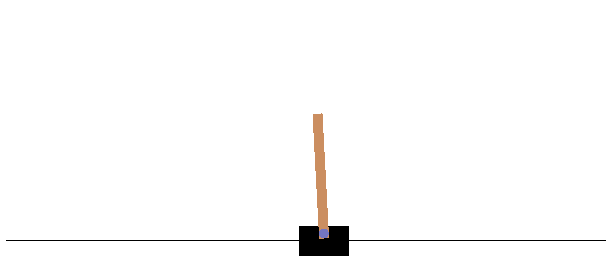
> oparte na: Barto, Sutton & Anderson *Neuronlike Adaptive Elements That Can Solve Difficult Learning Control Problem*, 1983

Słupek zamocowany jest do wózka, który porusza się bez tarcia po ścieżce. Przestrzeń stanów jest czteroelementowa:
* pozycja wózka,
* szybkość wózka,
* kąt nachylenia słupka,
* szybkość obrotu słupka.

Możemy kontrolować ruch wózka przykładając do niego siłę +1 lub -1. Celem jest zapobieganie przewróceniu słupka. Nagroda +1 przyznawana jest za każdy krok, kiedy słupek pozostaje pionowo. Epizod kończy się, gdy słupek odchylony jest o więcej niż 15 stopni od pionu, lub gry wózek odsunie się o ponad 2,4 jednostki od środka.


In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay stable-baselines3[extra] > /dev/null 2>&1
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [929 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [55.4 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu 

In [ ]:
import os
import random

import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
from matplotlib import animation
from pyvirtualdisplay import Display
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import plot_results, load_results
from stable_baselines3.dqn.policies import MlpPolicy

from IPython import display as ipythondisplay


SEED = 13
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

DISPLAY = Display(visible=0, size=(400, 300))
DISPLAY.start()


Metoda Deep Q-Learning wraz z wymienionymi wcześniej ulepszeniami jest już zaimplementowana w bibliotece Stable-Baselines3. Najpierw sprawdźmy hiperparametry, jakie możemy podać do modelu:


In [ ]:
help(DQN)


Help on class DQN in module stable_baselines3.dqn.dqn:

class DQN(stable_baselines3.common.off_policy_algorithm.OffPolicyAlgorithm)
 |  DQN(policy: Union[str, Type[stable_baselines3.dqn.policies.DQNPolicy]], env: Union[gymnasium.core.Env, ForwardRef('VecEnv'), str], learning_rate: Union[float, Callable[[float], float]] = 0.0001, buffer_size: int = 1000000, learning_starts: int = 100, batch_size: int = 32, tau: float = 1.0, gamma: float = 0.99, train_freq: Union[int, Tuple[int, str]] = 4, gradient_steps: int = 1, replay_buffer_class: Optional[Type[stable_baselines3.common.buffers.ReplayBuffer]] = None, replay_buffer_kwargs: Optional[Dict[str, Any]] = None, optimize_memory_usage: bool = False, target_update_interval: int = 10000, exploration_fraction: float = 0.1, exploration_initial_eps: float = 1.0, exploration_final_eps: float = 0.05, max_grad_norm: float = 10, stats_window_size: int = 100, tensorboard_log: Optional[str] = None, policy_kwargs: Optional[Dict[str, Any]] = None, verbose:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kluczowym argumentem podawanym do modelu jest `policy`, czyli model strategii wykorzystywany w modelu. W Stable-Baselines3 każda metoda DRL posiada własny zestaw strategii - w przypadku DQN dostępne są trzy wersje (moduł `stable_baselines3.dqn.policies`:
- `MlpPolicy` - w pełni połączona
- `CnnPolicy` - z warstwami konwolucyjnymi
- `MultiInputPolicy` - dla środowisk, które umożliwiają obserwacje w formie obrazów jak i wartości.

W tym przykładzie będziemy wykorzystywać `MlpPolicy`, ponieważ środowisko nie zwraca obserwacji w formie obrazów. Sprawdźmy zatem, jakie argumenty ona przyjmuje (mogą one być przekazywane przez argument modelu `policy_kwargs`).


In [ ]:
help(MlpPolicy)


Help on class DQNPolicy in module stable_baselines3.dqn.policies:

class DQNPolicy(stable_baselines3.common.policies.BasePolicy)
 |  DQNPolicy(observation_space: gymnasium.spaces.space.Space, action_space: gymnasium.spaces.discrete.Discrete, lr_schedule: Callable[[float], float], net_arch: Optional[List[int]] = None, activation_fn: Type[torch.nn.modules.module.Module] = <class 'torch.nn.modules.activation.ReLU'>, features_extractor_class: Type[stable_baselines3.common.torch_layers.BaseFeaturesExtractor] = <class 'stable_baselines3.common.torch_layers.FlattenExtractor'>, features_extractor_kwargs: Optional[Dict[str, Any]] = None, normalize_images: bool = True, optimizer_class: Type[torch.optim.optimizer.Optimizer] = <class 'torch.optim.adam.Adam'>, optimizer_kwargs: Optional[Dict[str, Any]] = None) -> None
 |  
 |  Policy class with Q-Value Net and target net for DQN
 |  
 |  :param observation_space: Observation space
 |  :param action_space: Action space
 |  :param lr_schedule: Learni

Szczególnie interesującym będzie dla nas argument `net_arch`, definiujący architekturę modelu strategii (jest to lista integerów, opisująca liczbę neuronów w poszczególnych warstwach ukrytych).


Deklarujemy funkcję do wyświetlania działania modelu. Poza tworzeniem animacji wykonuje ona również ewaluację modelu, sprawdzając w 100 epizodach osiąganą całkowitą wartość zwrotu.

Sprawdzimy od razu, jak zachowuje się niewytrenowany (losowy) model (zwróćmy uwagę, że musimy podać model strategii, jak i środowisko, w jakim model ma działać - możemy uzyskać do niego dostęp wywołując metodę modelu `get_env`).


In [ ]:
import gymnasium as gym

def visualize_model(model, max_steps=50):
    """Show how a model works in the environment."""
    env = model.get_env()
    obs = env.reset()

    fig, ax = plt.subplots()
    frames = []
    done = False

    while not done:
        frames.append(env.render(mode="rgb_array"))
        with torch.no_grad():
            action, _ = model.predict(obs)
        obs, reward, done, info = env.step(action)
        if len(frames) >= max_steps:
            break


    anim = animation.FuncAnimation(
        fig=fig,
        func=lambda i: ax.imshow(frames[i]),
        frames=range(len(frames)),
        interval=100,
        blit=False,
    )
    plt.close()

    reward_avg, reward_std = evaluate_policy(model, env, n_eval_episodes=100)
    print(f"Reward in episode: {reward_avg:.2f} +/- {reward_std:.2f}")

    return anim.to_jshtml()


env = gym.make("CartPole-v1", render_mode='rgb_array')
model = DQN(MlpPolicy, env)
display(ipythondisplay.HTML(visualize_model(model)))

Reward in episode: 9.34 +/- 0.79


Zaczniemy od deklaracji uproszczonego modelu, ze stałą wartością $\epsilon$, bez target network oraz z experience replay o długości batcha (efektywnie - brakiem experience replay). Następnie będziemy chcieli włączać ulepszenia oraz stroić hiperparametry aby sprawdzić, jak wpływają one na działanie modelu. Do wytrenowania modelu służy metoda `learn`. Sprawdźmy jej parametry.


In [ ]:
help(DQN.learn)

Help on function learn in module stable_baselines3.dqn.dqn:

learn(self: ~SelfDQN, total_timesteps: int, callback: Union[NoneType, Callable, List[ForwardRef('BaseCallback')], ForwardRef('BaseCallback')] = None, log_interval: int = 4, tb_log_name: str = 'DQN', reset_num_timesteps: bool = True, progress_bar: bool = False) -> ~SelfDQN
    Return a trained model.
    
    :param total_timesteps: The total number of samples (env steps) to train on
    :param callback: callback(s) called at every step with state of the algorithm.
    :param log_interval: for on-policy algos (e.g., PPO, A2C, ...) this is the number of
        training iterations (i.e., log_interval * n_steps * n_envs timesteps) before logging;
        for off-policy algos (e.g., TD3, SAC, ...) this is the number of episodes before
        logging.
    :param tb_log_name: the name of the run for TensorBoard logging
    :param reset_num_timesteps: whether or not to reset the current timestep number (used in logging)
    :param 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Z punktu widzenia analizy działania modelu potrzebna jest jedynie liczba kroków uczenia `total_timesteps`. Możemy też wyregulować częstość ewaluacji oraz logowania (wyświetlanie logu odbywa się jedynie przy ustawieniu `verbose=1`). Oprócz tego chcielibyśmy jednak także wyświetlić krzywą uczenia. Wykorzystujemy w tym celu wrapper na środowisko w Unity `Monitor`. Jako parametry przyjmuje on środowisko, które będziemy monitorować, oraz folder, w którym będziemy zapisywać logi. Możemy je potem wczytać i wyświetlić wykorzystując metody `load_results` i `plot_results`.


In [ ]:
RESULTS_DIR = "/tmp/"

env = Monitor(env, filename=RESULTS_DIR)


Deklarujemy model. Ustawiając rozmiar bufora oraz start i częstość trenowania równe wielkości mini-batcha efektywnie wyłączamy experience replay, a aktualizując sieć w interwale równym wielkości batcha model trenowany będzie bez *target network*. Ponadto, dobieramy odpowiednio wartości schedulera $\epsilon$, tak, aby współczynnik ten był stały podczas trenowania.


In [ ]:
batch_size = 64
lr = 1e-4
gamma = 0.8
eps = 0.1

env = gym.make("CartPole-v1", render_mode='rgb_array')
log_dir = "/tmp/vanilla/"
os.makedirs(log_dir, exist_ok=True)  # we have to create this dir - it does not exist
env = Monitor(env, filename=log_dir)

vanilla_dqn = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    buffer_size=batch_size, learning_starts=batch_size, train_freq=batch_size,  # disable experience replay
    target_update_interval=batch_size,  # disable target network
    exploration_fraction=1, exploration_initial_eps=eps, exploration_final_eps=eps,  # disable epsilon scheduling
    verbose=1,  # show information throughout training
)


Using cpu device
Wrapping the env in a DummyVecEnv.


Wytrenujmy zatem taki prosty model w 100 000 kroków i sprawdźmy jakie osiągnie on po tym czasie rezultaty.


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
|    n_updates        | 1332     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8648     |
|    fps              | 1214     |
|    time_elapsed     | 70       |
|    total_timesteps  | 85389    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0797   |
|    n_updates        | 1333     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.1      |
| time/               |          |
|    episodes         | 8652     |
|    fps              | 1214     |
|    time_elapsed     | 70       |
|    total_timesteps  | 8

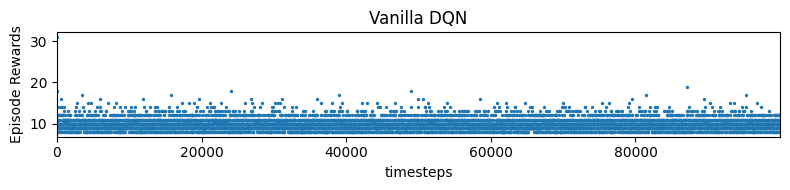

In [ ]:
total_timesteps = 100000

vanilla_dqn.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(vanilla_dqn)))
plot_results([log_dir], total_timesteps, "timesteps", "Vanilla DQN")


Jak widać, metoda Deep Q-Learning w domyślnym ustawieniu nie działa zbyt dobrze - model nie zbiega, oscylując wokół początkowych wartości nagrody. Być może strojenie hiperparametrów poprawiłoby osiągane rezultaty?

Sprawdźmy, jaka była maksymalna wartość zgromadzona w trakcie uczenia. Posłuży nam w tym celu funkcja `load_results`. Zwraca ona pandasowy DataFrame, w którym znajdują się informacje o każdym epizodzie w trakcie trenowania: uzyskanej nagrodzie `r`, długości epizodu `l` oraz jego czasie trwania `t`.


In [ ]:
results = load_results(log_dir)
display(results.head(5))
print(f"Max reward: {results.r.max()}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index     r   l         t
0      0  14.0  14  0.055328
1      1  18.0  18  0.058326
2      2  12.0  12  0.060114
3      3  31.0  31  0.117352
4      4  11.0  11  0.137560

Max reward: 31.0


Spróbujemy powtórzyć wytrenowanie modelu, tym razem z wykorzystaniem *experience replay*.

Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 18       |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3357     |
|    time_elapsed     | 0        |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.988    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1799     |
|    time_elapsed     | 0        |
|    total_timesteps  | 129      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.695    |
|    n_updates        | 7        |
----------------------------------


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.982    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 1247     |
|    time_elapsed     | 0        |
|    total_timesteps  | 191      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.596    |
|    n_updates        | 22       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.974    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 999      |
|    time_elapsed     | 0        |
|    total_timesteps  | 269      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.606    |
|    n_updates      

Max reward: 321.0


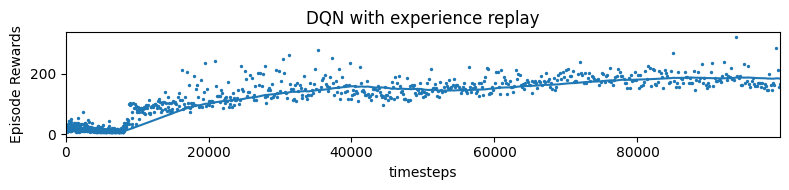

In [ ]:
batch_size = 64
lr = 1e-4
gamma = 0.8

env = gym.make("CartPole-v1", render_mode='rgb_array')
log_dir = "/tmp/exp_replay/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, filename=log_dir)

dqn_exp = DQN(
    MlpPolicy, env,
    learning_rate=lr, batch_size=batch_size, gamma=gamma, seed=SEED,
    target_update_interval=batch_size,  # disable target network
    verbose=1,  # show information throughout training
)

total_timesteps = 100000

dqn_exp.learn(total_timesteps)
display(ipythondisplay.HTML(visualize_model(dqn_exp)))
plot_results([log_dir], total_timesteps, "timesteps", "DQN with experience replay")
results = load_results(log_dir)
print(f"Max reward: {results.r.max()}")


Jak widać rezultaty są dużo lepsze. Ale może udałoby się poprawić proces trenowania? Tego dotyczyć będą zadania.


## Zadanie 1

Zbadaj wpływ pozostałych ze wspomnianych hipeparametrów na trenowanie i działanie modelu. Skup się na zmianie architektury modelu strategii, hiperparametrach trenowania (gamma, epsilon itp.). Zapisz swoje wnioski oraz przygotuj wizualizacje uzyskiwanych rezultatów oraz animacje działania modelu.


In [ ]:
import time
import itertools
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import matplotlib.pyplot as plt


def get_average_for_param(result: pd.DataFrame, param: str, score: str = "max_reward") -> pd.DataFrame:
    avg_scores = result.groupby(param)[score].mean()
    avg_scores_df = avg_scores.reset_index()
    avg_scores_df.columns = [param, score]
    return avg_scores_df

def plot_avg_scores(result: pd.DataFrame, param: str, score: str = "max_reward", ax: plt.Axes = None):
    avg_scores = get_average_for_param(result, param, score)
    avg_learning_time = get_average_for_param(result, param, "learning_time")

    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    color = 'tab:orange'
    ax.set_xlabel(param.capitalize())
    ax.set_ylabel(score, color=color)
    ax.plot(avg_scores[param], avg_scores[score], color=color)
    ax.scatter(avg_scores[param], avg_scores[score], color=color)
    ax.tick_params(axis='y', labelcolor=color)
    ax.legend([score], loc='upper left')

    ax2 = ax.twinx()
    color = 'tab:green'
    ax2.set_ylabel("Learning Time", color=color)
    ax2.plot(avg_learning_time[param], avg_learning_time["learning_time"], color=color)
    ax2.scatter(avg_learning_time[param], avg_learning_time["learning_time"], color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(["Learning Time"], loc='upper right')

    ax.yaxis.set_major_formatter('{x:.2f}')
    ax2.yaxis.set_major_formatter('{x:.2f} s')

    if ax is None:
        fig.tight_layout()
        plt.title(f"{score} and Learning Time for Different {param.capitalize()} Values per Dataset")
        plt.show()



def plot_metrics(result: pd.DataFrame, params: list[str], score: str = "max_reward"):
    num_plots = len(params)
    num_cols = num_plots
    num_rows = 1

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 6))
    axs = axs.flatten()

    for i, param in enumerate(params):
        ax = axs[i]
        plot_avg_scores(result, param, score, ax=ax)

    # Hide empty subplots if there are any
    if num_plots < num_cols:
        for ax in axs[num_plots:]:
            ax.axis('off')

    fig.tight_layout()
    plt.show()

def train_model(gamma: float, tau: float, learning_rate: float, total_timesteps:int = 100_000):
    batch_size = 64

    env = gym.make("CartPole-v1", render_mode='rgb_array')
    log_dir = f"/tmp/exp_replay/{gamma}_{tau}_{learning_rate}/"
    os.makedirs(log_dir, exist_ok=True)
    env = Monitor(env, filename=log_dir)

    dqn_exp = DQN(
        MlpPolicy,
        env,
        learning_rate=learning_rate,
        batch_size=batch_size,
        gamma=gamma,
        tau=tau,
        seed=SEED,
        target_update_interval=batch_size,
        verbose=0,
    )

    start_time = time.time()
    dqn_exp.learn(total_timesteps)
    end_time = time.time()

    results = load_results(log_dir)

    performance_metrics = {
        "max_reward": results.r.max(),
        "mean_reward": results.r.mean(),
        "median_reward": results.r.median(),
        "final_reward": results.r.iloc[-1],
        "reward_std": results.r.std(),
        "learning_time": end_time - start_time,
        "gamma": gamma,
        "tau": tau,
        "learning_rate": learning_rate
    }

    return performance_metrics

In [25]:
gammas = [0.75, 0.8, 0.9]
taus = [0.001, 0.005, 0.01]
learning_rates = [ 3e-4,1e-2, 1e-3]

params = list(itertools.product(gammas, taus, learning_rates))

cart_results = []
for i in tqdm(range(len(params)), total=len(params)):
    gamma, tau, lr = params[i]
    result = train_model(gamma, tau, lr)
    cart_results.append(result)

cart_results_df = pd.DataFrame(cart_results)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  0%|          | 0/27 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


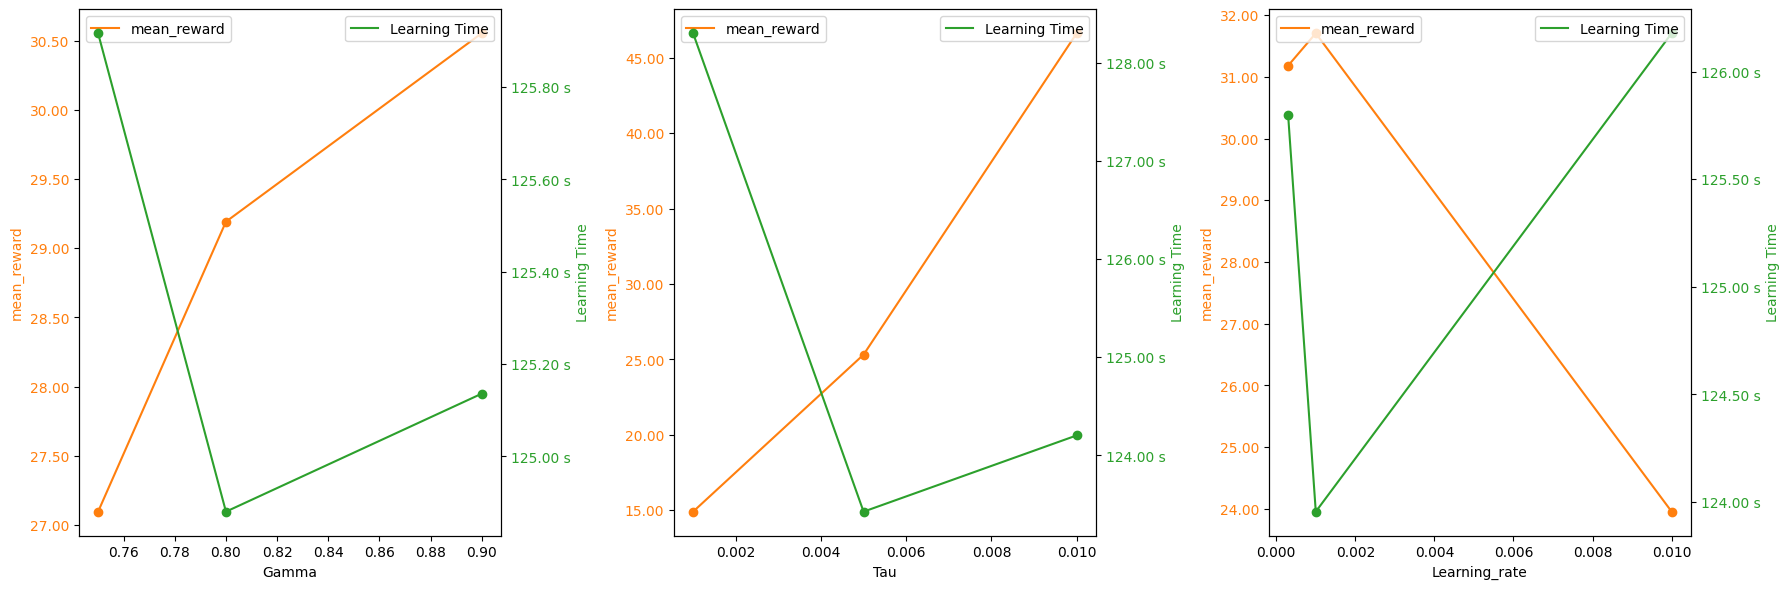

In [26]:
plot_metrics(cart_results_df, ["gamma", "tau", "learning_rate"], "mean_reward")

# Mean reward
Gamma, Tau proporcjonalna, lr odwrotnie proporcjonalny

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


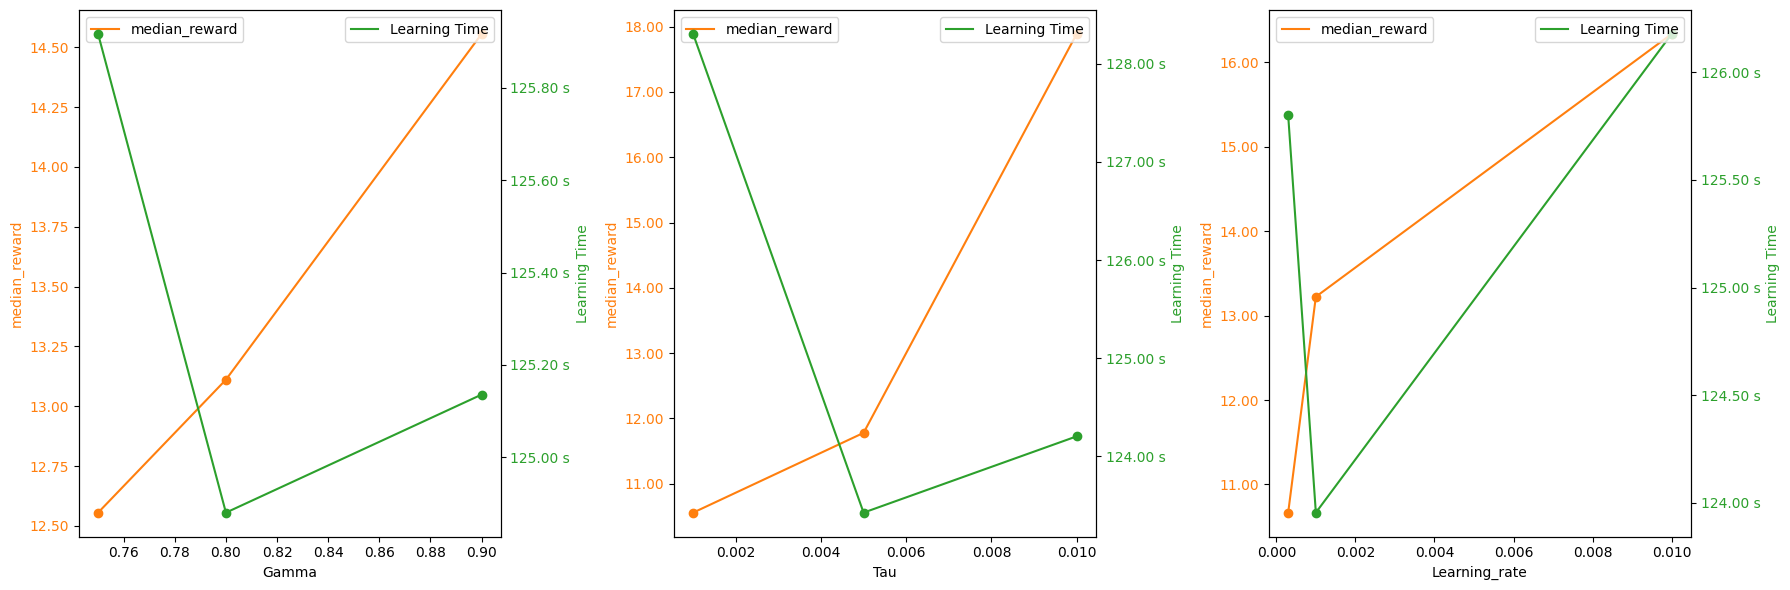

In [27]:
plot_metrics(cart_results_df, ["gamma", "tau", "learning_rate"], "median_reward")

# Median reward
Gamma, Tau proporcjonalna, lr tez

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


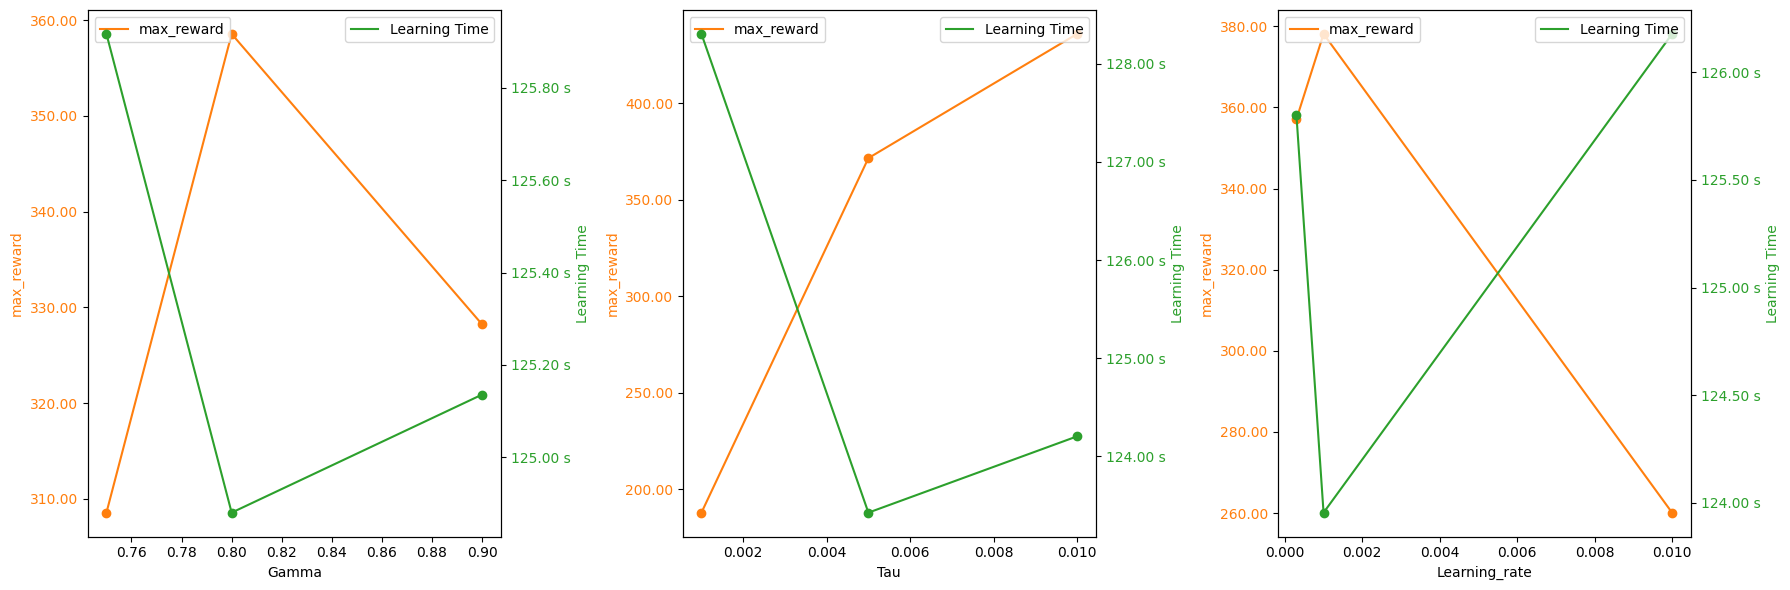

In [28]:
plot_metrics(cart_results_df, ["gamma", "tau", "learning_rate"], "max_reward")

# Max reward
Gamma ma maksimum, Tau proporcjonalna, lr odwrotnie proporcjonalny

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


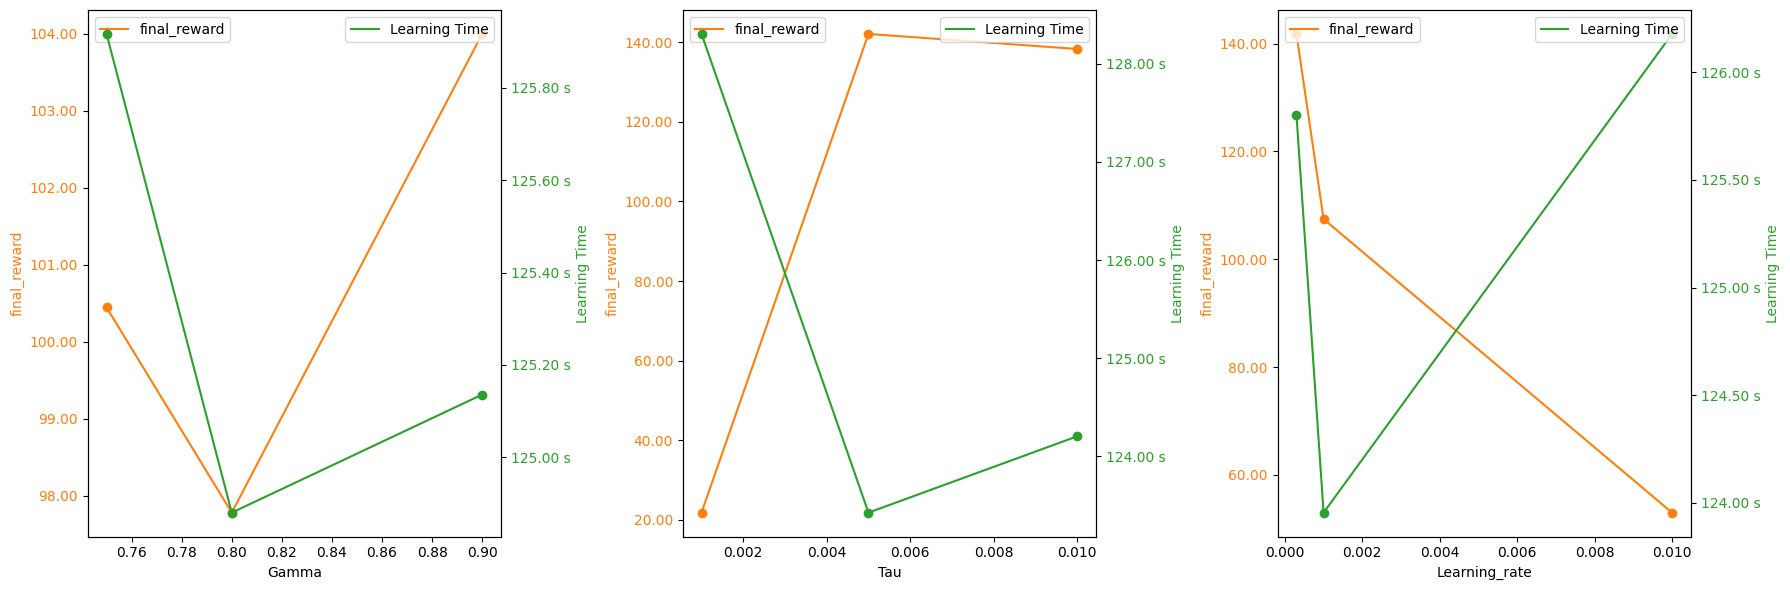

In [29]:
plot_metrics(cart_results_df, ["gamma", "tau", "learning_rate"], "final_reward")

# Final reward

Gamma ma minimum, Tau proporcjonalne, lr odwrotnie

## Zadanie 2

Wykorzystaj metodę Deep Q-Learning do przygotowania agenta działającego w wybranym innym środowisku z biblioteki [Gym](https://gym.openai.com/envs). Ze względu na cechy modelu zwróć uwagę na dopasowanie środowiska (np. przestrzeń akcji powinna być dyskretna). Zapoznaj się z definicją funkcji nagrody przyznawanej agentowi w środowisku, aby można było zinterpretować rezultaty osiągane przez model. Jeśli zdecydujesz się na wykorzystanie środowiska z obserwacjami wizualnymi, pamiętaj o zmianie typu modelu strategii (uwaga: trenowanie modeli w oparciu o obserwacje wizualne z wykorzystaniem sieci konwolucyjnym jest długotrwałe i może być bardziej niestabilne niż w przypadku strategii MLP). Spróbuj dostroić hiperparametry trenowania do nowego środowiska.


In [30]:
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise

def train_model(gamma: float, tau: float, sigma: float, timesteps: int = 10_000, show_res: bool = False):
    batch_size = 64
    env_name = 'MountainCarContinuous-v0'
    env = gym.make(env_name, render_mode='rgb_array')
    log_dir = f"/tmp/ddpg/{env_name}/{gamma}_{tau}/"
    os.makedirs(log_dir, exist_ok=True)
    env = Monitor(env, filename=log_dir)

    n_actions = env.action_space.shape[-1]
    action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=sigma * np.ones(n_actions))

    model = DDPG(
        MlpPolicy,
        env,
        buffer_size=500000,
        batch_size=batch_size,
        gamma=gamma,
        tau=tau,
        seed=SEED,
        action_noise=action_noise,
        verbose=0,
    )

    start_time = time.time()
    model.learn(total_timesteps=timesteps)
    end_time = time.time()

    results = load_results(log_dir)

    performance_metrics = {
        "max_reward": results.r.max(),
        "mean_reward": results.r.mean(),
        "median_reward": results.r.median(),
        "final_reward": results.r.iloc[-1],
        "reward_std": results.r.std(),
        "learning_time": end_time - start_time,
        "gamma": gamma,
        "tau": tau,
        "sigma": sigma
    }
    if show_res:
        display(ipythondisplay.HTML(visualize_model(model)))
        plot_results([log_dir], timesteps, "timesteps", "DDPG")

    return performance_metrics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:

gammas = [.7, .8, .9]
taus = [.02, .04,.06]
sigmas = [.05, .1, .2]

params = list(itertools.product(gammas, taus, sigmas))

car_results = []
for i in tqdm(range(len(params)), total=len(params)):
    gamma, tau, sigma = params[i]
    result = train_model(gamma, tau, sigma)
    car_results.append(result)
    checkpoint = pd.DataFrame(car_results)
    checkpoint.to_csv(f"checkpoint{i}.csv")

car_results_df = pd.DataFrame(car_results)

  0%|          | 0/27 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


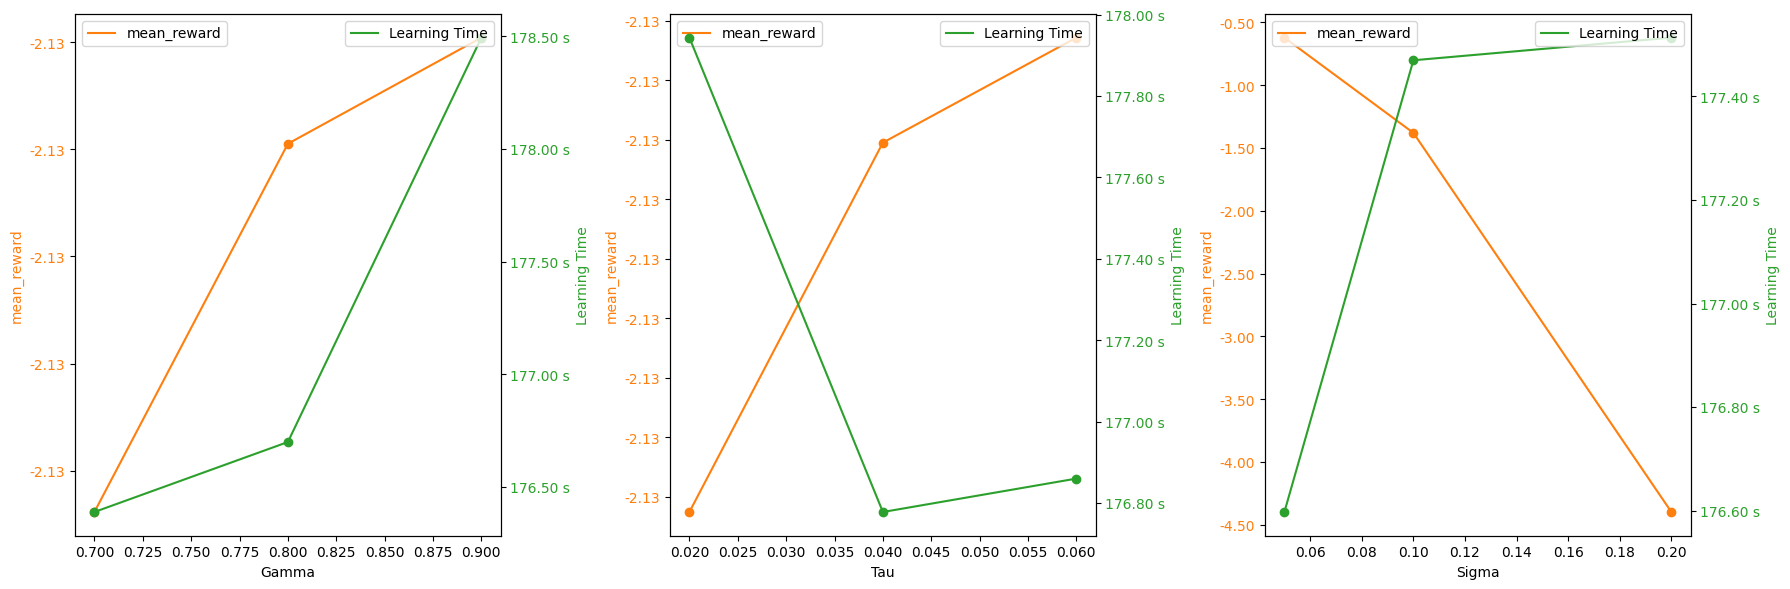

In [32]:
plot_metrics(car_results_df, ["gamma", "tau", "sigma"], "mean_reward")

# Mean reward
Gamma proporcjonalna z lt, tau oraz sigma odwortnie proporcjonalna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


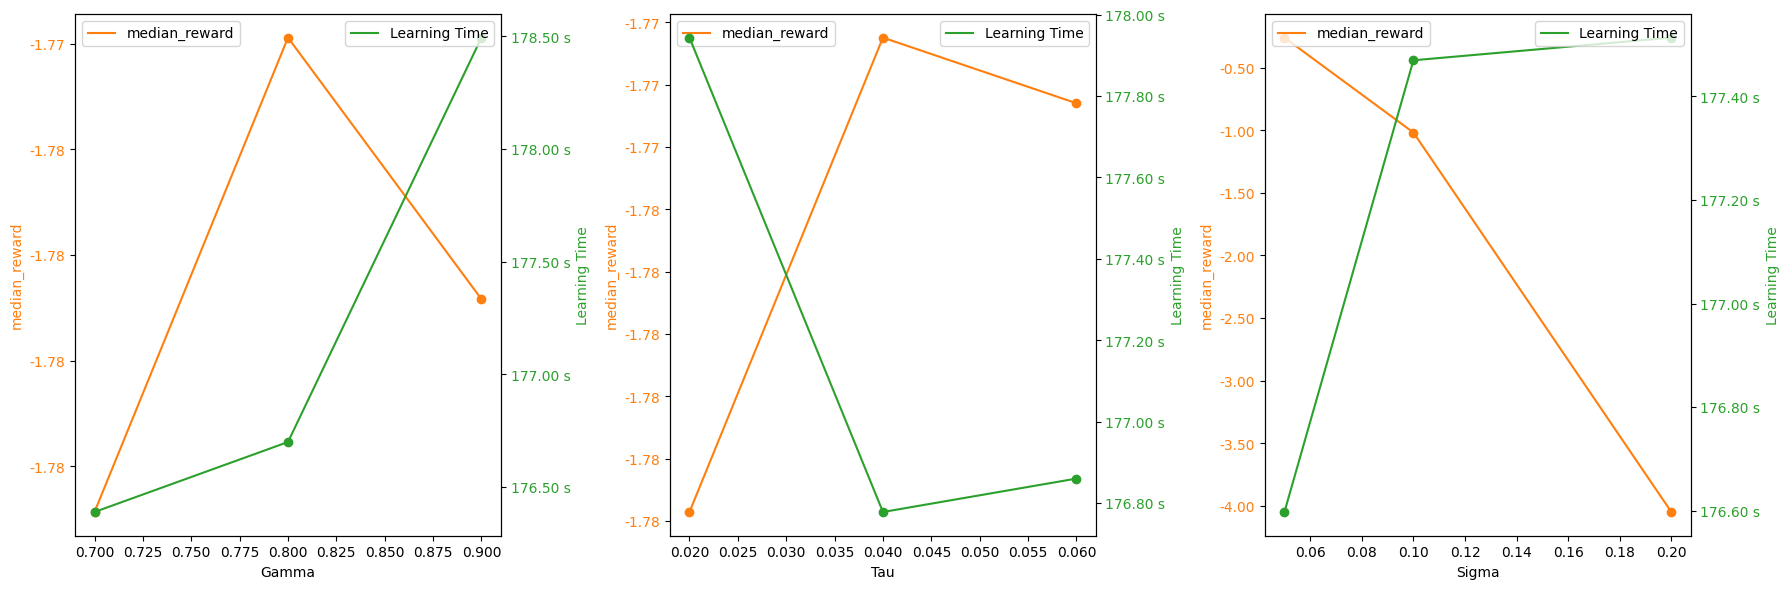

In [33]:
plot_metrics(car_results_df, ["gamma", "tau", "sigma"], "median_reward")

# Median reward
Gamma różnie propocjonalna lt, tau oraz sigma odwortnie proporcjonalna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


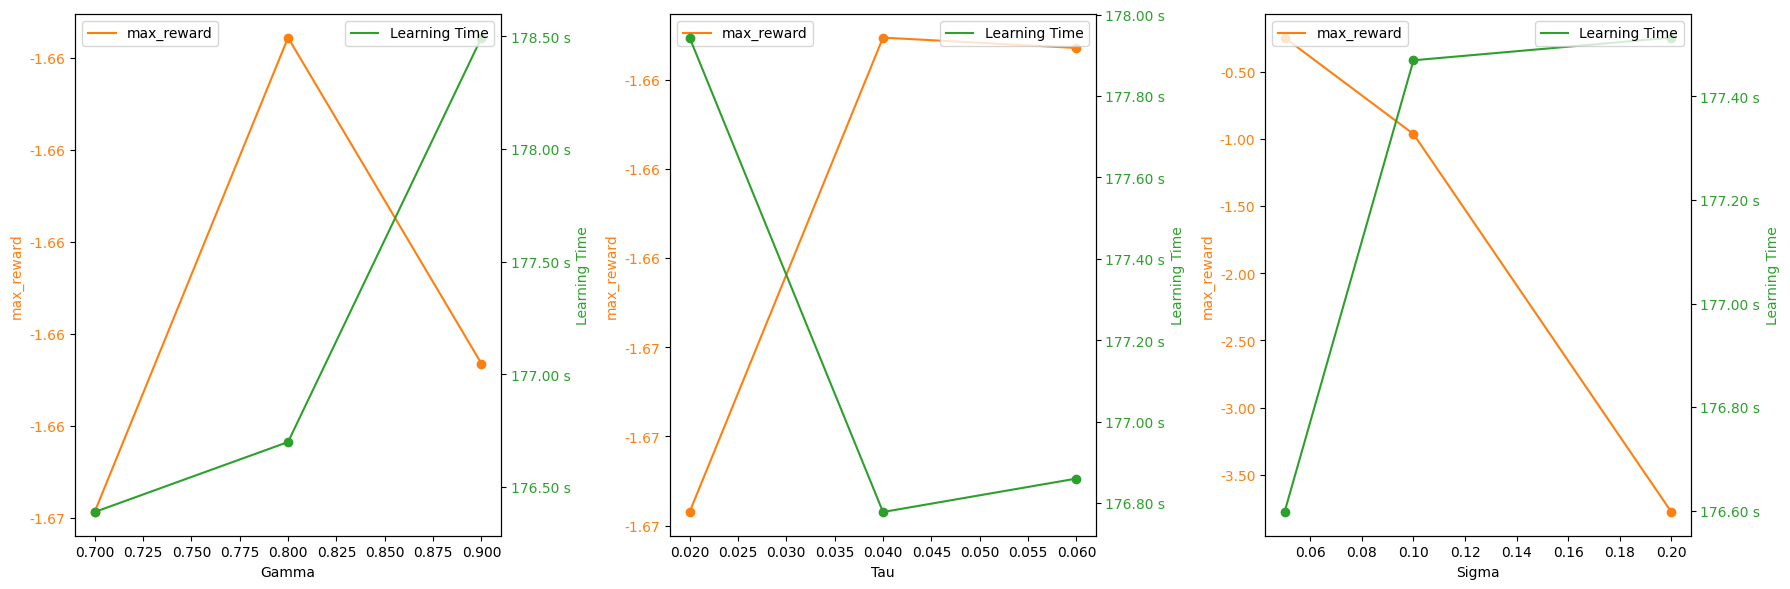

In [34]:
plot_metrics(car_results_df, ["gamma", "tau", "sigma"], "max_reward")

# Max reward
Gamma różnie propocjonalna lt, tau oraz sigma odwrotnie proporcjonalna

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


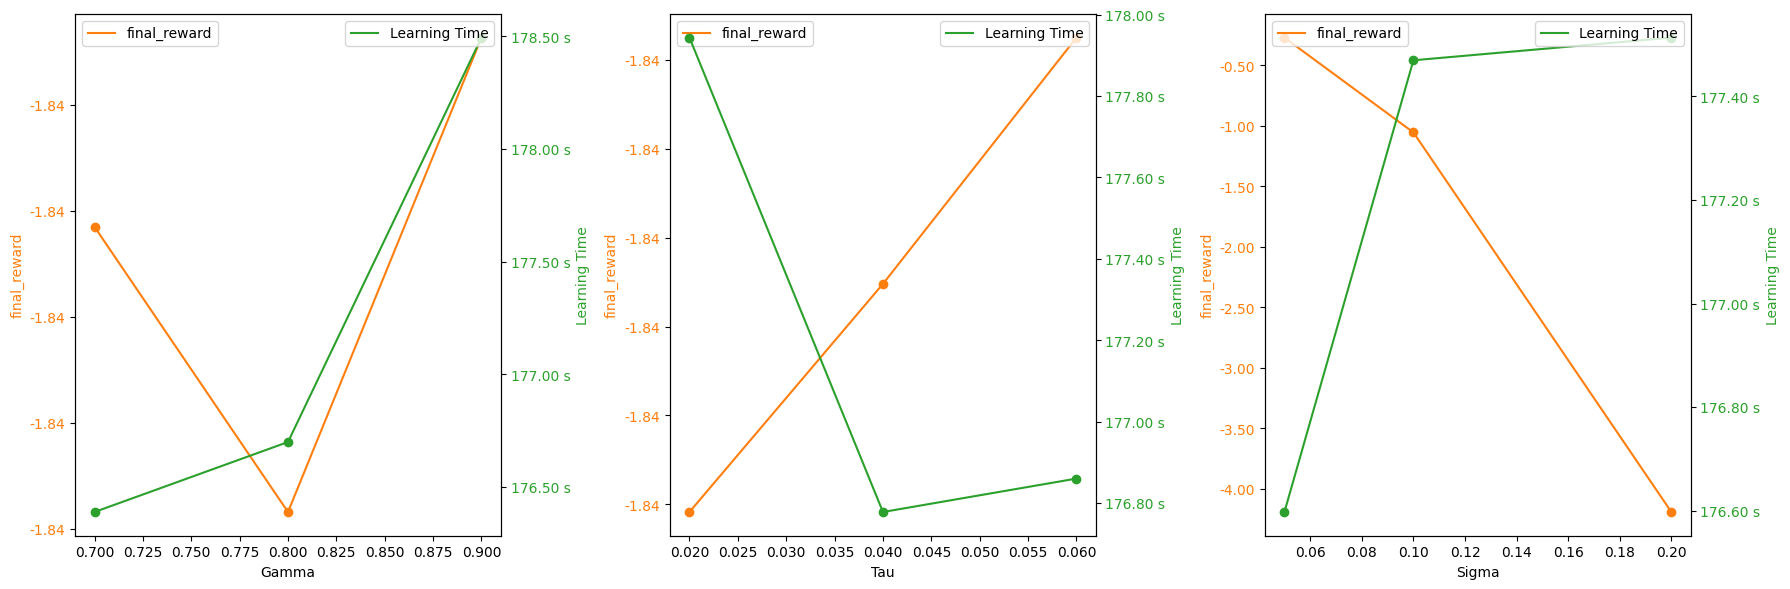

In [35]:
plot_metrics(car_results_df, ["gamma", "tau", "sigma"], "final_reward")

# Final reward
Gamma różnie propocjonalna lt, tau oraz sigma odwortnie proporcjonalna

In [36]:
car_results_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


max_reward  mean_reward  median_reward  final_reward  reward_std  \
0    -0.248699    -0.616972      -0.257567     -0.273964    1.121598   
1    -0.980450    -1.385202      -1.022514     -1.054273    1.124039   
2    -3.787006    -4.407790      -4.080915     -4.200704    1.088884   
3    -0.243470    -0.622334      -0.260536     -0.266380    1.139745   
4    -0.963843    -1.375260      -1.015843     -1.049909    1.127851   
5    -3.764924    -4.402879      -4.046939     -4.196198    1.110739   
6    -0.247759    -0.618645      -0.257445     -0.269104    1.131776   
7    -0.949291    -1.377742      -1.008960     -1.045690    1.149200   
8    -3.798998    -4.400912      -4.044220     -4.187140    1.100903   
9    -0.245897    -0.623185      -0.259997     -0.274298    1.143018   
10   -0.963430    -1.382298      -1.032976     -1.057949    1.124196   
11   -3.781301    -4.392482      -4.038037     -4.189658    1.097300   
12   -0.247452    -0.616587      -0.260242     -0.272336    1.125012   
13   -0.970962    -1.382134      -1.017456     -1.048460    1.128669   
14   -3.765514    -4.403662      -4.052301     -4.201774    1.108353   
15   -0.248482    -0.622601      -0.256785     -0.267066    1.141654   
16   -0.958021    -1.376272      -1.014358     -1.053780    1.133144   
17   -3.756955    -4.393049      -4.042597     -4.202263    1.098971   
18   -0.248412    -0.624746      -0.265154     -0.269635    1.135977   
19   -0.954955    -1.380429      -1.021677     -1.058635    1.129963   
20   -3.817100    -4.393462      -4.048877     -4.190643    1.081734   
21   -0.244146    -0.618837      -0.263191     -0.268212    1.129189   
22   -0.969692    -1.378050      -1.010011     -1.053703    1.122715   
23   -3.761512    -4.392866      -4.032670     -4.189719    1.094342   
24   -0.247856    -0.627275      -0.269681     -0.269021    1.140989   
25   -0.970041    -1.378652      -1.026311     -1.061629    1.126293   
26   -3.756203    -4.393492      -4.048309     -4.166093    1.122798   

    learning_time  gamma   tau  sigma  
0      175.646574    0.7  0.02   0.05  
1      174.335464    0.7  0.02   0.10  
2      178.217412    0.7  0.02   0.20  
3      176.914589    0.7  0.04   0.05  
4      174.252475    0.7  0.04   0.10  
5      178.021247    0.7  0.04   0.20  
6      177.964250    0.7  0.06   0.05  
7      175.394874    0.7  0.06   0.10  
8      176.740084    0.7  0.06   0.20  
9      174.624121    0.8  0.02   0.05  
10     182.433220    0.8  0.02   0.10  
11     179.736750    0.8  0.02   0.20  
12     172.283742    0.8  0.04   0.05  
13     177.037546    0.8  0.04   0.10  
14     174.192534    0.8  0.04   0.20  
15     178.055666    0.8  0.06   0.05  
16     176.550650    0.8  0.06   0.10  
17     175.371014    0.8  0.06   0.20  
18     176.041092    0.9  0.02   0.05  
19     180.216390    0.9  0.02   0.10  
20     180.239447    0.9  0.02   0.20  
21     181.452202    0.9  0.04   0.05  
22     179.685397    0.9  0.04   0.10  
23     177.158955    0.9  0.04   0.20  
24     176.393731    0.9  0.06   0.05  
25     177.322437    0.9  0.06   0.10  
26     177.944984    0.9  0.06   0.20

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Reward in episode: -0.00 +/- 0.00


   max_reward  mean_reward  median_reward  final_reward  reward_std  \
0    -0.24347    -0.622334      -0.260536      -0.26638    1.139745   

   learning_time  gamma   tau  sigma  
0     174.224838    0.7  0.04   0.05  


LoadMonitorResultsError: No monitor files of the form *monitor.csv found in /tmp/ddpg/MountainCarContinuous-v0/[0.7, 0.04, 0.05]/

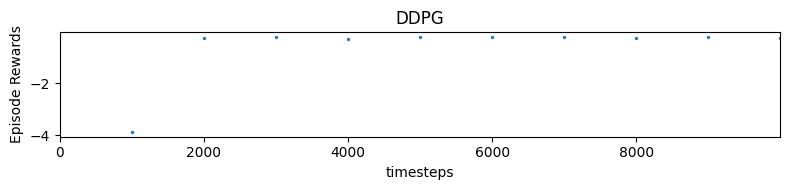

In [37]:
iterations = 100_000

res = list(car_results_df.sort_values(by="max_reward", ascending=False).head(1).iloc[0,-3:])
result = train_model(*res, iterations, True)
pd.DataFrame([result]).to_csv("final.csv")
print(pd.DataFrame([result]))

env_name = 'MountainCarContinuous-v0'
log_dir = f"/tmp/ddpg/{env_name}/{res}/"
results = load_results(log_dir)
plot_results([log_dir], iterations, "timesteps", "DDPG")